In [1]:
# Import necessary packages here, e.g.
import numpy as np                 # for numerical operations
import matplotlib.pyplot as plt    # for plotting

# Add other packages as needed, for example:
import pandas as pd                # for data manipulation
import xarray as xr                # for creating multi dimensional arrays 
import cartopy.crs as ccrs         # for creating maps 
import cartopy.feature as cfeature # for adding features to maps 

# Latitudinal and Seasonal Variations in Chlorophyll-A Concentration
**Cassie Chin**  
OCEAN 215 Final Project  
Autumn 2024

## Introduction

<!-- Include your motivation and any background information needed to understand your research question and data analysis. Clearly state your research question and hypothesis. -->

Phytoplankton are the base of the marine food web. Their presence and abundance controls the health of the ecosystem. These microscopic organisms are vital indicators of the current water chemistry. They are able to quickly react to their changing environments as they have very short residence times, with quick reproduction rates. Knowing that these organisms are vital to study due to these reasons, the purpose of this research is to see how will surface chlorophyll levels change with temporal and latitudinal variation. It is hypothesized that there will be higher levels of chlorophyll with increasing latitudes, and that there will be higher chlorophyll levels closer to summer months. 




## Data sources:
<!-- List each data source used in your project. For each dataset, include: 
     - Where you accessed it from 
     - Date you accessed/downloaded it 
     - Data collection process
     - Relevant variables (including unit) 
     - Spatial and temporal coverage and resolution 
     - Description of any obstacles or challenges you faced in obtaining the dataset
     - URL to the dataset if available -->

- ### Gradients 2 Cruise ###
  - Downloaded from SimonsCMAP on 2024-11-12
  - Data collection process: 
    - Chl-A data collected by an AC-S moored sensor 
    - SST data collected by an Thermosalinograph
  - Relevant variables included: 
    - Latitude (°N)
    - Longitude (°W)
    - sst (°C)
    - Chlorophyll a from AC-S (mg/m<sup>3</sup>)
  - Spatial coverage and resolution:
    - Cruise Transect
    - Lat Range 21° to 46°N
    - Lon Range -157.66° to -158.35
  - Obstacles to data access:
      - Data for chl-a and temperature were not on the same data set so I had to make sure I was pulling from the proper data sets rather than depth profiles 
  - Temporal coverage and resolution: 
     - About 3-4 hours between measurement 
     - 5/26-6/13/2017
  - URL to dataset:
     - [MGL1704 Full Cruise Data](https://simonscmap.com/catalog/cruises/MGL1704)
     - [MGL1704 Chl-A data](https://simonscmap.com/catalog/datasets/Gradients2_MGL1704_Optics_LISST_ACS_ECO)
<br>
- ### Gradients 3 Cruise ###
  - Downloaded from SimonsCMAP on 2024-11-20
  - Data collection process: 
    - Chl-A data collected by an AC-S moored sensor 
    - SST data collected by an Thermosalinograph
  - Relevant variables included: 
    - Latitude (°N)
    - Longitude (°W)
    - sst (°C)
    - Chlorophyll a from AC-S (mg/m<sup>3</sup>)
  - Spatial coverage and resolution:
    - Cruise Transect
    - Lat Range 21° to 42°N
    - Lon Range -157.88° to -158.33°
  - Obstacles to data access:
      - Data for chl-a and temperature were not on the same data set so I had to make sure I was pulling from the proper data sets rather than depth profiles 
  - Temporal coverage and resolution: 
     - About 3-4 hours between measurement 
     - 4/10-4/29/2019
  - URL to dataset:
    - [KM1906 Full Cruise Data](https://simonscmap.com/catalog/cruises/KM1906)
    - [KM1906 Chl-A data](https://simonscmap.com/catalog/datasets/Gradients3_KM1906_Optics_LISST_ACS_ECO)

## 1. Analyzing Latitudunal Chlorophyll and Temperature Trends 


<!-- In this cell, introduction the data set(s) you are working with, specify which aspect of your research question this section addresses, and describe the figure you will produce. -->

This figure was made with data from SimonsCMAP from two different cruises following similar transects. Both of these used AC-S data to record chlorophyll values every 3-4 hours along a two week cruise. These figures are set to address how surface chlorophyll levels change with temporal and latitudinal variation. Each part of the final figure standing alone is able to show an answer to chlorophyll levels changing with latitudinal variation, and together it is able to compare changes in the area over a two month span. 

In [2]:
# load data file(s)
msstdata = "MGL1704sst.csv"
msst_df = pd.read_csv(msstdata)
mchldata = "MGL1704chl.csv"
mchl_df = pd.read_csv(mchldata)

ksstdata = "KM1906sst.csv"
ksst_df = pd.read_csv(ksstdata)
kchldata = "KM1906chl.csv"
kchl_df = pd.read_csv(kchldata)
# as part of commenting your code throughout this section, discuss any problems you encountered and how you solved them

In [3]:
#creating a xr dataset, pulling data from my dataframe
new_ds = xr.Dataset({ 'chl' : (['lat'], mchl_df['chla_acs'].values)}, 
                    coords={'lat':mchl_df['lat'].values, 'lan': ('lat', mchl_df['lon'].values)})

In [4]:
# perform data cleaning steps

#printing first few rows 
print(mchl_df.head())
#creating a xr dataset, pulling data from my dataframe
mds = xr.Dataset({ 'chl' : (['lat'], mchl_df['chla_acs'].values)}, 
                    coords={'lat':mchl_df['lat'].values, 'lan': ('lat', mchl_df['lon'].values)})
# Find the min and max for lat and chl
lat_min = new_ds.lat.min()
lat_max = new_ds.lat.max()


chl_min = new_ds.chl.min()
chl_max = new_ds.chl.max()

# Printing the results
print(lat_min, "to", lat_max)
print(chl_min, "to", chl_max)

                       time    lat     lon  depth  vol_lisst_sm   
0  2017-05-28T07:36:00.000Z  21.31 -158.23      5           NaN  \
1  2017-05-28T07:37:00.000Z  21.31 -158.23      5      0.006220   
2  2017-05-28T07:38:00.000Z  21.31 -158.23      5      0.004098   
3  2017-05-28T07:39:00.000Z  21.31 -158.23      5      0.002535   
4  2017-05-28T07:40:00.000Z  21.31 -158.23      5      0.001713   

   vol_lisst_mid  vol_lisst_lg  particle_num  cp  chla_acs  chla_eco   
0            NaN           NaN           NaN NaN       NaN       NaN  \
1       0.058342      0.080201  4.466687e+06 NaN       NaN       NaN   
2       0.057848      0.088040  3.413742e+06 NaN       NaN  0.024995   
3       0.057887      0.091885  2.639392e+06 NaN       NaN  0.024666   
4       0.060553      0.083490  2.034229e+06 NaN       NaN  0.025198   

   scatter_eco  
0     0.000064  
1     0.000064  
2     0.000067  
3     0.000066  
4     0.000069  
<xarray.DataArray 'lat' ()>
array(21.3) to <xarray.DataArray '

In [5]:
# checking ds 
print(mds)

<xarray.Dataset>
Dimensions:  (lat: 20441)
Coordinates:
  * lat      (lat) float64 21.31 21.31 21.31 21.31 ... 29.69 29.69 29.69 29.68
    lan      (lat) float64 -158.2 -158.2 -158.2 -158.2 ... -158.0 -158.0 -158.0
Data variables:
    chl      (lat) float64 nan nan nan nan nan nan ... nan nan nan nan nan nan


(0.0, 2.0)

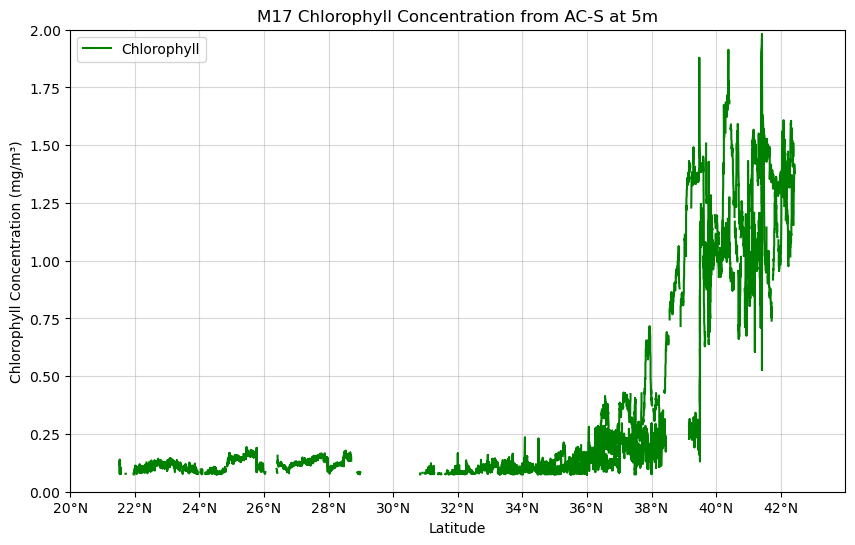

In [6]:
# make and display the first figure for MGL1704
# first draft of figure one
plt.figure(figsize=(10,6))
plt.plot(new_ds.lat, new_ds.chl, label="Chlorophyll", color='g')
#adding labels 
plt.title('M17 Chlorophyll Concentration from AC-S at 5m')
plt.xlabel('Latitude')
plt.ylabel('Chlorophyll Concentration (mg/m³)')
#adding grid and legend 
plt.grid(True, alpha=0.5)
plt.legend()

#making spicy x axis labels yay mat plot lib 
    #https://matplotlib.org/stable/users/explain/axes/axes_ticks.html

plt.xticks(np.arange(20, 44, 2)) # custom ticks 2 values apart from 26 through 44
#collecting
xlabels = plt.gca().get_xticks()
spicy_labels = [f'{xlabel}°N' for xlabel in xlabels]
plt.xticks(xlabels, spicy_labels)

#changing the range of the axis to be consistent between years
plt.xlim(20,44)
plt.ylim(0,2)

In [7]:
# perform data analysis

#for second draft of figure one
#merging dataframes on the lat values 
mdf = pd.merge(mchl_df, msst_df, on='lat', how='outer')
#creating array 
mds = xr.Dataset({
    'chlorophyll': (['lat'], mdf['chla_acs'].values),
    'temperature': (['lat'], mdf['sst'].values)}, coords={'lat': mdf['lat'].values})

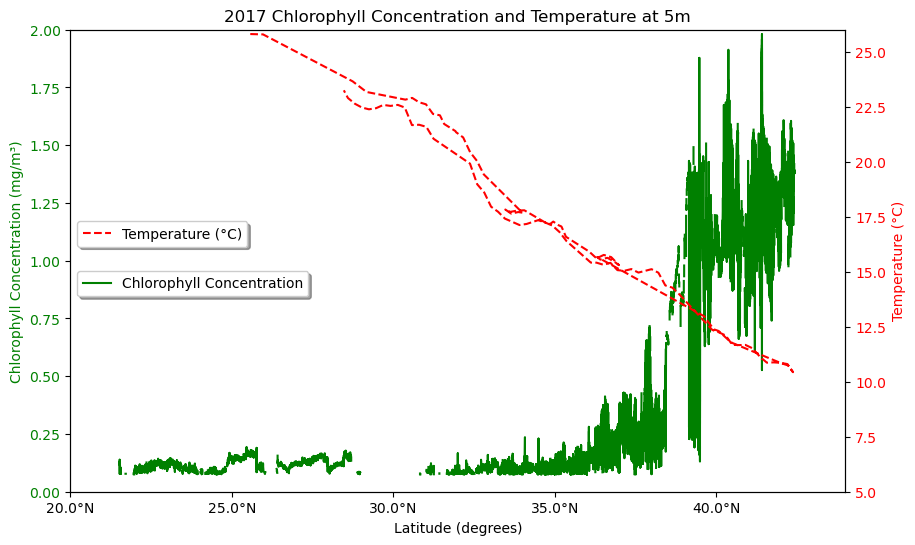

In [8]:
#second draft of figure one
plt.figure(figsize=(10,6))
plt.title('2017 Chlorophyll Concentration and Temperature at 5m')
plt.xlabel('Latitude')
plt.ylabel('Chlorophyll Concentration (mg/m³)')


#plotting data on different axis 
ax1 = plt.gca()
ax1.plot(mds.lat, mds.chlorophyll, label='Chlorophyll Concentration', color='g')
ax1.set_xlabel('Latitude (degrees)')
ax1.set_ylabel('Chlorophyll Concentration (mg/m³)', color='g')
ax1.tick_params(axis='y', labelcolor='g')
ax2 = ax1.twinx()
ax2.plot(mds.lat, mds.temperature, label='Temperature (°C)', color='r', linestyle='--')
ax2.set_ylabel('Temperature (°C)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

labels = plt.gca().get_xticks()  # Get current x-tick labels
new_labels = [f'{label}°N' for label in labels]  # Add '°N' to each label
plt.xticks(labels, new_labels)  # Update the x-axis labels

plt.xlim(20,44)
ax1.set_ylim(0, 2)  # y-limits for chl
ax2.set_ylim(5, 26) # y limits for temp

ax1.legend(loc='center left',shadow=True, bbox_to_anchor=(0, 0.45)) #bbox moves around legend, letting me move it away from the cornres and adding a shadow 
ax2.legend(loc='upper left',shadow=True, bbox_to_anchor=(0, 0.60))

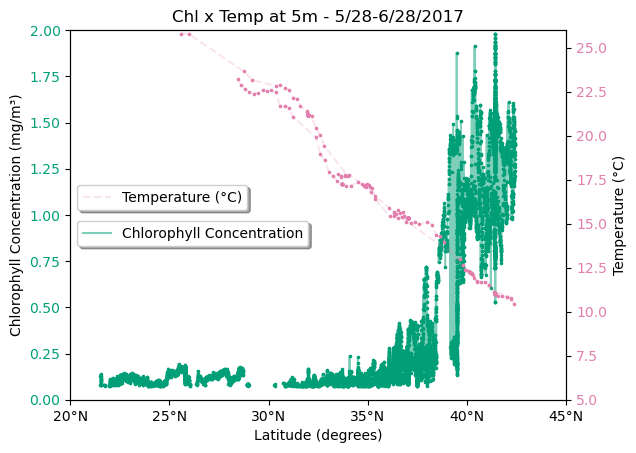

In [9]:
# third and final draft of figure one for MGL1704
#fixing colors to be colorblind friendly / for presentation 
plt.title('Chl x Temp at 5m - 5/28-6/28/2017')
plt.xlabel('Latitude')
plt.ylabel('Chlorophyll Concentration (mg/m³)')


#plotting data on different axis 
ax1 = plt.gca()
ax1.scatter(mds.lat, mds.chlorophyll, color='#009F77', marker = '.', s=10)  # Scatter plot
ax1.plot(mds.lat, mds.chlorophyll, label='Chlorophyll Concentration', color='#009F77', alpha = 0.5)
ax1.set_xlabel('Latitude (degrees)')
ax1.set_ylabel('Chlorophyll Concentration (mg/m³)', color='k')
ax1.tick_params(axis='y', labelcolor='#009F77')

ax2 = ax1.twinx()
ax2.scatter(mds.lat, mds.temperature, color='#E27FAD', marker = '.',  s = 10)  
ax2.plot(mds.lat, mds.temperature, label='Temperature (°C)', color='#E27FAD', linestyle='--', alpha = 0.2)
ax2.set_ylabel('Temperature (°C)', color='k')
ax2.tick_params(axis='y', labelcolor='#E27FAD')

tick_positions = range(20, 46, 5) 
plt.xticks(tick_positions) 

labels = plt.gca().get_xticks()  # Get current x-tick labels
new_labels = [f'{label}°N' for label in labels]  # Add '°N' to each label
plt.xticks(labels, new_labels)  # Update the x-axis labels

plt.xlim(20,45)
ax1.set_ylim(0, 2)  # y-limits for chl
ax2.set_ylim(5, 26) # y limits for temp

ax1.legend(loc='center left',shadow=True, bbox_to_anchor=(0, 0.45))
ax2.legend(loc='upper left',shadow=True, bbox_to_anchor=(0, 0.60))

In [10]:
kdf = pd.merge(kchl_df, ksst_df, on='lat', how='outer') #same process as above for KM1906

In [11]:
kds = xr.Dataset({
    'chlorophyll': (['lat'], kdf['chla_acs'].values),
    'temperature': (['lat'], kdf['sst'].values)}, coords={'lat': kdf['lat'].values})

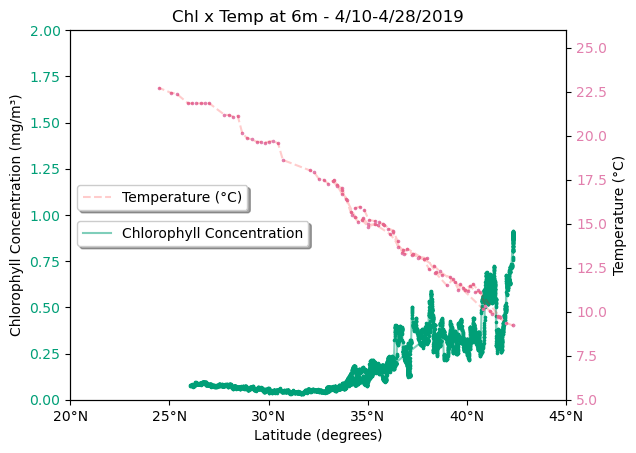

In [12]:
#labeling and setting title
plt.title('Chl x Temp at 6m - 4/10-4/28/2019')
plt.xlabel('Latitude')
plt.ylabel('Chlorophyll Concentration (mg/m³)')

#plotting data on different axis 
ax1 = plt.gca()
ax1.scatter(kds.lat, kds.chlorophyll, color='#009F77', marker = '.', s=10)  # scatter plot
ax1.plot(kds.lat, kds.chlorophyll, label='Chlorophyll Concentration', color='#009F77', alpha = 0.5) # linear plot
ax1.set_xlabel('Latitude (degrees)')
ax1.set_ylabel('Chlorophyll Concentration (mg/m³)', color='k') #labelling axis 
ax1.tick_params(axis='y', labelcolor='#009F77')

ax2 = ax1.twinx() #adding second axis, same format as adding chlorophyll 
ax2.scatter(kds.lat, kds.temperature, color='#E27FAD', marker = '.',  s = 10)  
ax2.plot(kds.lat, kds.temperature, label='Temperature (°C)', color='r', linestyle='--', alpha = 0.2)
ax2.set_ylabel('Temperature (°C)', color='k')
ax2.tick_params(axis='y', labelcolor='#E27FAD') #using color blind friendly colors

tick_positions = range(20, 46, 5) 
plt.xticks(tick_positions) 

labels = plt.gca().get_xticks()  # pulling active x-tick labels
new_labels = [f'{label}°N' for label in labels]  # Add '°N' to each label
plt.xticks(labels, new_labels)  # assign the new x-axis labels

plt.xlim(20,45) #setting limits to x-axis to have the same parameters between figures 

ax1.set_ylim(0, 2)  # y-limits for chl
ax2.set_ylim(5, 26) # y limits for temp

ax1.legend(loc='center left',shadow=True, bbox_to_anchor=(0, 0.45)) #moving legend to not cover up areas of data 
ax2.legend(loc='upper left',shadow=True, bbox_to_anchor=(0, 0.60))

<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
**Figure 1 Caption:** Chlorophyll-A and Temperature values across 20°N to 45°N in 2017 and 2019. From the Gradients 2 and 3 cruises.

## 2. Analyzing Cruise Transects  

<!-- In the introduction below, specify the data set(s) you are working with in this section, which aspect of your research question this section addresses, and the figure you will produce -->

The following figures are using temporal data (latitude and longitude) to create projections of both cruise transects. This is to 

Short introduction to this section here.

In [13]:
# if a new dataset, load data and perform data cleaning steps
# otherwise, continue to data analysis and figure creation

In [14]:
print(mchl_df.columns)

Index(['time', 'lat', 'lon', 'depth', 'vol_lisst_sm', 'vol_lisst_mid',
       'vol_lisst_lg', 'particle_num', 'cp', 'chla_acs', 'chla_eco',
       'scatter_eco'],
      dtype='object')


In [15]:
mchl_df = mchl_df[['time', 'lat', 'lon', 'depth', 'chla_acs']] #getting rid of extra data columns in older data set 
print(mchl_df.columns) 

Index(['time', 'lat', 'lon', 'depth', 'chla_acs'], dtype='object')


In [16]:
# display(M17_df)
M17_ds = xr.Dataset({'Mlat': ('time', mchl_df['lat'].values),
        'Mlon': ('time', mchl_df['lon'].values),
        'Mdepth': ('time', mchl_df['depth'].values),
        'Mchla_acs': ('index', mchl_df['chla_acs'].values)})

In [17]:
print(kchl_df.columns)

Index(['time', 'lat', 'lon', 'depth', 'chla_acs'], dtype='object')


In [18]:
K19_ds = xr.Dataset({'Klat': ('time', kchl_df['lat'].values),
        'Klon': ('time', kchl_df['lon'].values),
        'Kdepth': ('time', kchl_df['depth'].values),
        'Kchla_acs': ('index', kchl_df['chla_acs'].values)})

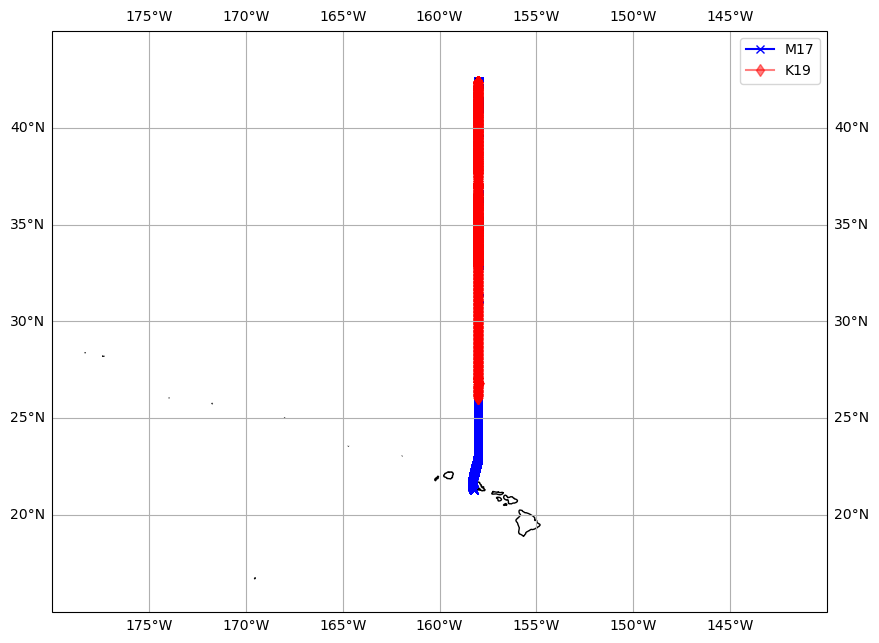

In [19]:
#creating plot  
#hard to read 
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.gridlines(draw_labels=True)

ax.plot(M17_ds['Mlon'].values, M17_ds['Mlat'].values, marker='x', color='blue', label='M17')
ax.plot(K19_ds['Klon'].values, K19_ds['Klat'].values, marker='d', alpha = 0.5, color='red', label='K19')

ax.set_extent([-180, -140, 15, 45], crs=ccrs.PlateCarree())

ax.legend()

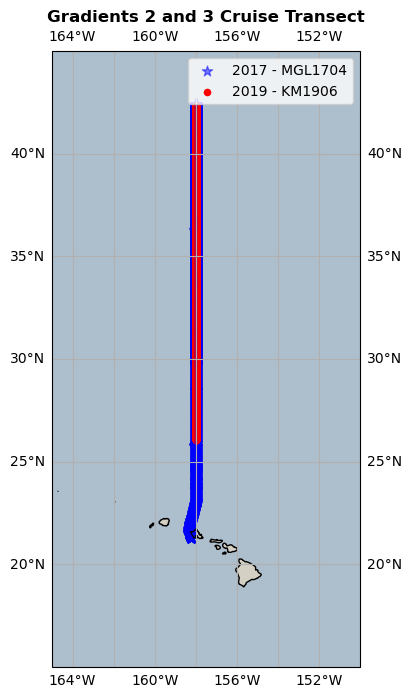

In [20]:
# fire map loading in 
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.gridlines(draw_labels=True, alpha = 1)

ax.add_feature(cfeature.LAND, facecolor= '#D4D0C4')  # color the land
ax.add_feature(cfeature.OCEAN, facecolor='#ADBECC')  # color the ocean
# to be able to use alpha on the dots 
ax.scatter(M17_ds['Mlon'].values, M17_ds['Mlat'].values, marker='*', s=60, color='blue', alpha=0.5, label='2017 - MGL1704')
ax.scatter(K19_ds['Klon'].values, K19_ds['Klat'].values, marker='o', s=20, color='red', alpha=1, label='2019 - KM1906')

#filling in the gaps between the dots 
ax.plot(M17_ds['Mlon'].values, M17_ds['Mlat'].values, color='blue', alpha = 0.4, linewidth=2)
ax.plot(K19_ds['Klon'].values, K19_ds['Klat'].values, color='red', alpha = 0.4, linewidth=2)

plt.title('Gradients 2 and 3 Cruise Transect',fontsize=12,fontweight='bold')

#cropping
ax.set_extent([-165, -150, 15, 45], crs=ccrs.PlateCarree())

ax.legend(fontsize = 10, loc='upper right')

In [21]:
#rounding time s = smoothed Mlat /Mlon
# https://docs.xarray.dev/en/latest/generated/xarray.apply_ufunc.html
M17_ds['sMlat']= xr.apply_ufunc(np.round, M17_ds['Mlat'])
#there is so little variation in lon
#M17_ds['Mlon'] = xr.apply_ufunc(np.round, M17_ds['Mlon']) 
K19_ds['sKlat']= xr.apply_ufunc(np.round, K19_ds['Klat'])


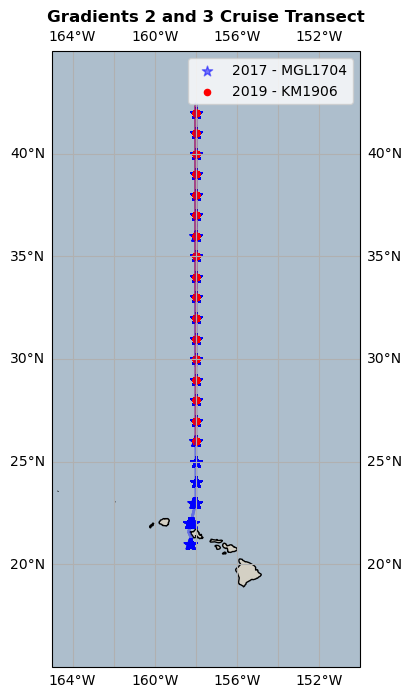

In [22]:
# fire map loading in 
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.gridlines(draw_labels=True, alpha = 1)

ax.add_feature(cfeature.LAND, facecolor= '#D4D0C4')  # color the land
ax.add_feature(cfeature.OCEAN, facecolor='#ADBECC')  # color the ocean
# to be able to use alpha on the dots 
ax.scatter(M17_ds['Mlon'].values, M17_ds['sMlat'].values, marker='*', s=60, color='blue', alpha=0.5, label='2017 - MGL1704')
ax.scatter(K19_ds['Klon'].values, K19_ds['sKlat'].values, marker='o', s=20, color='red', alpha=1, label='2019 - KM1906')

#filling in the gaps between the dots 
ax.plot(M17_ds['Mlon'].values, M17_ds['Mlat'].values, color='blue', alpha = 0.4, linewidth=2)
ax.plot(K19_ds['Klon'].values, K19_ds['Klat'].values, color='red', alpha = 0.4, linewidth=2)

plt.title('Gradients 2 and 3 Cruise Transect',fontsize=12,fontweight='bold')

#cropping
ax.set_extent([-165, -150, 15, 45], crs=ccrs.PlateCarree())

ax.legend(fontsize = 10, loc='upper right')

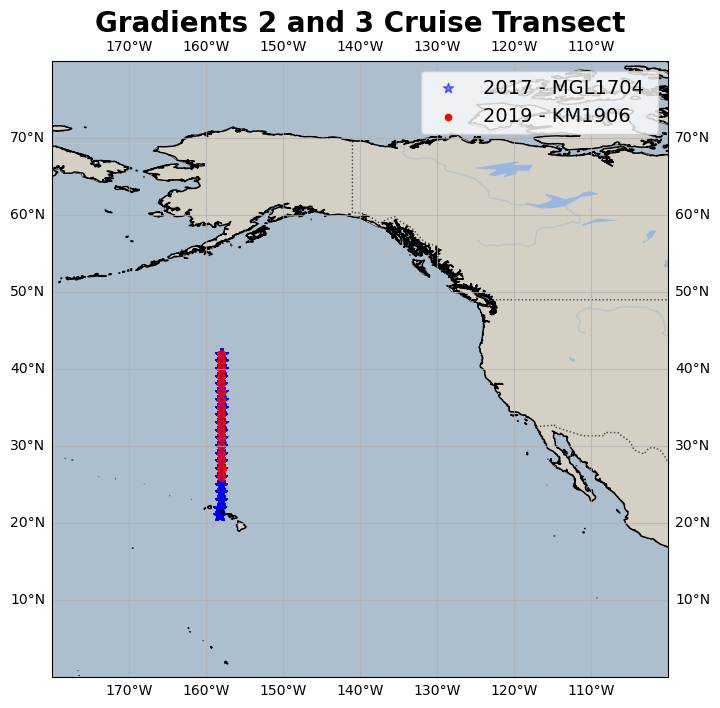

In [23]:
#same graph as above with a larger view point to orient viewers
# the first one was feeling a little stats for evil 

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.gridlines(draw_labels=True, alpha = 0.7)


# to be able to use alpha on the dots 
ax.scatter(M17_ds['Mlon'].values, M17_ds['sMlat'].values, marker='*', s=60, color='blue', alpha=0.5, label='2017 - MGL1704 ')
ax.scatter(K19_ds['Klon'].values, K19_ds['sKlat'].values, marker='o', s=20, color='red', alpha=1, label='2019 - KM1906')

#filling in the gaps between the dots 
ax.plot(M17_ds['Mlon'].values, M17_ds['Mlat'].values, color='blue', alpha = 0.4, linewidth=2)
ax.plot(K19_ds['Klon'].values, K19_ds['Klat'].values, color='red', alpha = 0.4, linewidth=2)

#view box
ax.set_extent([-180, -100, 80, 0], crs=ccrs.PlateCarree())


#https://scitools.org.uk/cartopy/docs/v0.14/examples/features.html?highlight=feature
#making the map just this much cooler

ax.add_feature(cfeature.OCEAN, facecolor='#ADBECC')  # color the ocean
ax.add_feature(cfeature.LAND, edgecolor='black', linewidth = 0.7)  # add land borders
ax.add_feature(cfeature.RIVERS, edgecolor='#ADBECC', linewidth=1, alpha=0.7) #add rivers and lakes because why not 
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.BORDERS, linestyle=':', alpha = 0.7)
ax.add_feature(cfeature.LAND, facecolor= '#D4D0C4')  # color the land

plt.title('Gradients 2 and 3 Cruise Transect',fontsize=20,fontweight='bold')

ax.legend(fontsize = 14)

<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
**Figure 2 Caption:** Cruise Tracks for Gradients 2 MGL1704 (2017) and Gradients 3 KM1906 (2019).

## 3. Chlorophyll Across Gradient's Path

<!-- In the introduction below, specify the data set(s) you are working with in this section, which aspect of your research question this section addresses, and the figure you will produce -->

This data set overlays surface chlorophyll values, indicated by a color bar, over the cruise transects. This gives a global way to visualize increasing chlorophyll levels in a spacial graphic. 

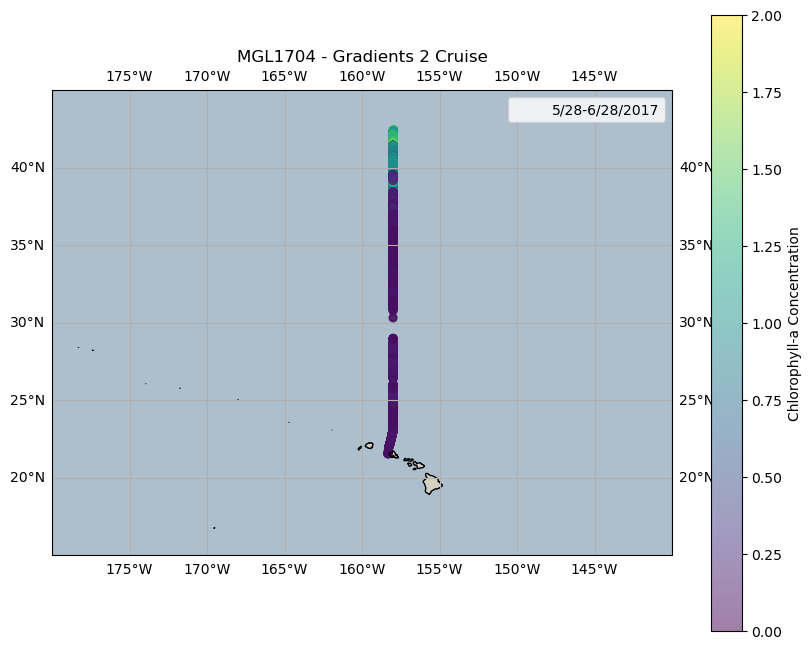

In [24]:
lat = M17_ds['Mlat'].values
lon = M17_ds['Mlon'].values
chla = M17_ds['Mchla_acs'].values  # Chlorophyll-a data

# opening new plt 
fig = plt.figure(figsize=(10, 8))
# yay i love loading all of this in just for my islands 
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.gridlines(draw_labels=True)
ax.add_feature(cfeature.LAND, facecolor= '#D4D0C4')  # color the land
ax.add_feature(cfeature.OCEAN, facecolor='#ADBECC')  # color the ocean
# getting fancy with the colors not that im going to use this because it wasn't my goal but i felt inspired to torture myself more
scatter = ax.scatter(lon, lat, c=chla, cmap='viridis', s=30, alpha=0.5, label="5/28-6/28/2017")

# add color bar
# WHY ARE YOU STILL TOUCHING MY LABELS GO AWAY 
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical')
cbar.set_label('Chlorophyll-a Concentration')
#range of the colors that you can't really see 
scatter.set_clim(0, 2)

#i love labeling 
ax.set_title("MGL1704 - Gradients 2 Cruise")

#fixing view 
ax.set_extent([-180, -140, 15, 45], crs=ccrs.PlateCarree())

#adding legend
plt.legend()

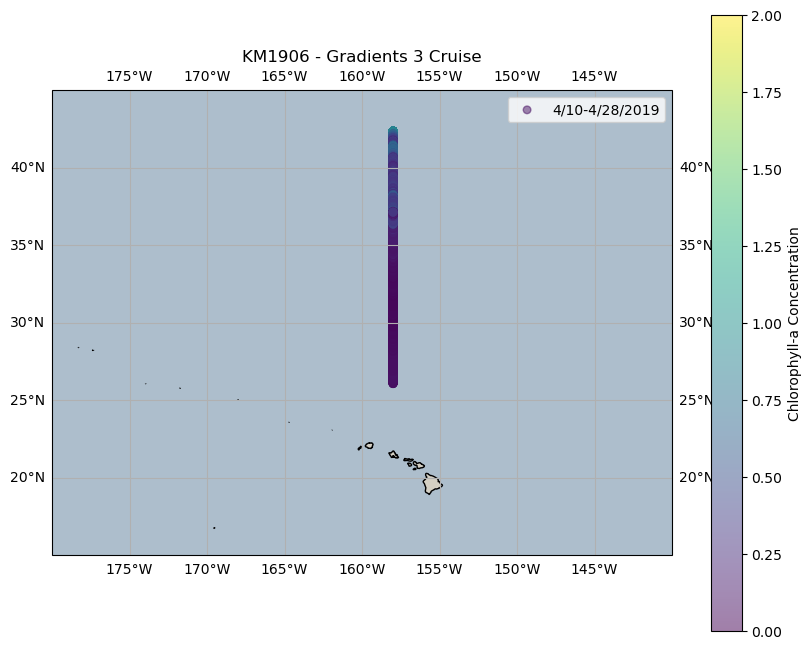

In [25]:
lat = K19_ds['Klat'].values
lon = K19_ds['Klon'].values
chla = K19_ds['Kchla_acs'].values 

# opening new plt 
fig = plt.figure(figsize=(10, 8))
# yay i love loading all of this in just for my islands again! 
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.gridlines(draw_labels=True)

ax.add_feature(cfeature.LAND, facecolor= '#D4D0C4')  # color the land
ax.add_feature(cfeature.OCEAN, facecolor='#ADBECC')  # color the ocean

# getting fancy with the colors not that im going to use this because it wasn't my goal but i felt inspired to torture myself more
scatter = ax.scatter(lon, lat, c=chla, cmap='viridis', s=30, alpha=0.5, label="4/10-4/28/2019")

# add color bar
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical')
cbar.set_label('Chlorophyll-a Concentration')
#setting color bar limits to be consitent between graphs, again i prob wont use these so effort gone unknown rip 
scatter.set_clim(0, 2)

#i love informative titles ! 
ax.set_title("KM1906 - Gradients 3 Cruise")

#fixing view 
ax.set_extent([-180, -140, 15, 45], crs=ccrs.PlateCarree()) 
#adding legend 
plt.legend()

<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
**Figure 3 Caption:** Surface chlorophyll values set along both cruise transects 

## Discussion
**Interpretation of Results:**  *(Write ~1 paragraph below)*
<!-- Summarize what you learned from each data analysis section/figure. Discuss key insights and conclusions regarding your research question. Do your results support or contradict your hypothesis? -->

As predicted, chlorophyll concentrations increase with increasing latitudes. This trend is seen in both cruises. The cruise in June (Gradients 2) has higher chlorophyll values, which is much more apparent at higher latitudes. There is a large spike in primary productivity above 40°N. This supports my hypothesis that at higher latitudes, in this range, will have higher chlorophyll values. There is a lot of similarity in chlorophyll values in both of the date ranges until 40°N, indicating that the seasonal changes are more influential the further away from the equator. This makes sense as you move further from the equator that there is more seasonal variability, especially with global solar radiation patterns.


**Limitations and Future Work:**  *(Write ~1 paragraph below)*
<!-- Identify limitations in your analysis. Discuss any factors that may have impacted the validity or reliability of your results (e.g., data quality, sample size, assumptions). -->
<!-- What next steps could you or another researcher take to continue investigating this research question? Suggest ideas for further research, data collection, or alternative methodologies that could enhance understanding of the topic. -->

For future research, looking into longer cruises spanning over longer distances may help support these conclusions. Adding in PAR data to show the seasonal variation of solar radiation would be important to analyze the impact of sunlight across different seasons. The other important variable that could be added into future studies is comparing nutrient levels to the chlorophyll levels. 

## References  

*Cite all papers, websites, or other resources you referenced in your project. Use a consistent citation style (e.g., APA, MLA, Chicago).*

1. Antonija Matek, Bosak, S., Luka Šupraha, Neeley, A., Hrvoje Višić, Ivona Cetinić, & Zrinka Ljubešić. (2023). Phytoplankton diversity and chemotaxonomy in contrasting North Pacific ecosystems. 11, e14501–e14501. https://doi.org/10.7717/peerj.14501
2. Bidigare, R. R., & Ondrusek, M. E. (1996). Spatial and temporal variability of phytoplankton pigment distributions in the central equatorial Pacific Ocean. Deep Sea Research Part II: Topical Studies in Oceanography, 43(4-6), 809–833. https://doi.org/10.1016/0967-0645(96)00019-7
3. Lindsey, R., & Scott, M. (2010, July 13). What Are Phytoplankton? Nasa.gov; NASA Earth Observatory. https://earthobservatory.nasa.gov/features/Phytoplankton
4. Rousseaux, C. S., & Gregg, W. W. (2012). Climate variability and phytoplankton composition in the Pacific Ocean. Journal of Geophysical Research: Oceans, 117(C10), n/a-n/a. https://doi.org/10.1029/2012jc008083
5. Simons Collaborative Marine Atlas Project. (2017). Simonscmap.com. https://simonscmap.com/catalog/cruises/MGL1704
6. Simons Collaborative Marine Atlas Project. (2019). Simonscmap.com. https://simonscmap.com/catalog/datasets/Gradients3_KM1906_Optics_LISST_ACS_ECO
7. Xu, Z., Cheung, S., Endo, H., Xia, X., Wu, W., Chen, B., Ho, E., Suzuki, K., Li, M., & Liu, H. (2022). Disentangling the Ecological Processes Shaping the Latitudinal Pattern of Phytoplankton Communities in the Pacific Ocean. MSystems, 7(1). https://doi.org/10.1128/msystems.01203-21